# More on types and tokens

Type: 'the' - 1
Token: 'the' - 5

from nltk.book import *
import nltk
import pandas as pd
import collections

In [2]:
porkyWords = "the the the the the that's all folks".split()

In [3]:
porkyWords.count('the')

5

## Type / Token ratio

Type / Token Ratio (TTR) is the number of types divided by the number of tokens

Usually a proxy for the vocabulary of a text. 

Important: very sensitive to the number of words in a text. If we are comparing, we need to make sure we've got roughly the same number of words in each thing we are comparing.

In [17]:
numTokens = len(porkyWords)
numTokens

8

In [15]:
numTypes = len(set(porkyWords))
numTypes

4

In [20]:
typeTokenRatio = numTypes / numTokens
typeTokenRatio

0.5

In [21]:
def typeTokenRatio(tokens):
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [22]:
typeTokenRatio(porkyWords)

0.5

In [25]:
allTexts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [31]:
for text in allTexts:
    print(f"{text.name} {' ' * (60 - len(text.name))} || {typeTokenRatio(text)}")

Moby Dick by Herman Melville 1851                             || 0.07406285585022564
Sense and Sensibility by Jane Austen 1811                     || 0.04826383002768831
The Book of Genesis                                           || 0.06230453042623537
Inaugural Address Corpus                                      || 0.06617622515804722
Chat Corpus                                                   || 0.13477005109975562
Monty Python and the Holy Grail                               || 0.1276595744680851
Wall Street Journal                                           || 0.12324685128531129
Personals Corpus                                              || 0.22765564002465585
The Man Who Was Thursday by G . K . Chesterton 1908           || 0.0983485761345412


In [32]:
truncatedTexts = []
for text in allTexts:
    truncatedTexts.append(text.tokens[:4000])

In [33]:
for text in truncatedTexts:
    print(f"{text.name} {' ' * (60 - len(text.name))} || {typeTokenRatio(text)}")

AttributeError: 'list' object has no attribute 'name'

## Aside: List comprehension

In [34]:
trunactedTexts = [text.tokens[:4000] for text in allTexts]

In [39]:
[len(text) for text in truncatedTexts]

[4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000]

In [40]:
def lowercaseIt(tokens):
    return [token.lower() for token in tokens]
    

In [43]:
lowercasedTruncatedTokens = [lowercaseIt(tokens) for tokens in truncatedTexts]

In [46]:
ttr = [typeTokenRatio(tokens) for tokens in lowercasedTruncatedTokens]

In [47]:
ttr

[0.31675, 0.21525, 0.14275, 0.288, 0.2665, 0.16775, 0.332, 0.1935, 0.2735]

In [49]:
for textName, ratio in zip(allTexts, ttr):
    print(textName.name, ratio)

Moby Dick by Herman Melville 1851 0.31675
Sense and Sensibility by Jane Austen 1811 0.21525
The Book of Genesis 0.14275
Inaugural Address Corpus 0.288
Chat Corpus 0.2665
Monty Python and the Holy Grail 0.16775
Wall Street Journal 0.332
Personals Corpus 0.1935
The Man Who Was Thursday by G . K . Chesterton 1908 0.2735


In [50]:
%pwd

'/Users/james/Python/computational-literary-analysis/Notes'

In [61]:
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()

In [62]:
moonstoneParts = moonstone.split('##')

In [63]:
moonstoneParts[5][:100]

'# First Period\n\nThe Loss of the Diamond (1848)\n\nThe events related by Gabriel Betteredge, house-stew'

In [70]:
betteredge = moonstoneParts[5:29]
clack = moonstoneParts[31:39]
bruff = moonstoneParts[40:43]

In [66]:
betteredge[23][:100]

'# Chapter XXIII\n\nI had kept the pony chaise ready, in case Mr.\xa0Franklin persisted in\nleaving us by t'

In [67]:
clack[-1][:100]

'# Chapter VIII\n\n“I have lost a beautiful girl, an excellent social position, and a\nhandsome income,”'

In [71]:
narrators = []
for narrator in [betteredge, clack, bruff]:
    narratorString = "\n".join(narrator)
    narrators.append(narratorString)

In [72]:
narrators.first

AttributeError: 'list' object has no attribute 'first'

In [79]:
narrators[2][:100]

'# Chapter I\n\nMy fair friend, Miss Clack, having laid down the pen, there are two\nreasons for my taki'

In [83]:
narrators = ["\n".join(narrator) for narrator in [betteredge, clack, bruff]]

In [84]:
narratorsDict = { 'betteredge': narrators[0], 'clack': narrators[1], 'bruff': narrators[2]}

In [86]:
narratorsDict["betteredge"][:100]

'# First Period\n\nThe Loss of the Diamond (1848)\n\nThe events related by Gabriel Betteredge, house-stew'

In [99]:
def typeTokenRatio(textString):
    tokens = nltk.word_tokenize(textString)
    numTokens = len(tokens)
    types = set(tokens)
    numTypes = len(types)
    
    return numTypes / numTokens

In [103]:
def dictToTypeTokenRatio(textDict):
    """
    Takes as input a dictionary, where the dictioanry keys are text labels and the dictionary values
    are a list of that text's string, and returns as output, that dictionary again, but with type token 
    ratios as values
    """    
    return { key: typeTokenRatio(value) for key, value in textDict.items() }
        


In [104]:
dictToTypeTokenRatio(narratorsDict)

{'betteredge': 0.07155880152181016,
 'clack': 0.12439623526814055,
 'bruff': 0.17438692098092642}

In [93]:
ttrs = []

for narr in narrators:
    print(typeTokenRatio(narr))

0.07155880152181016
0.12439623526814055
0.17438692098092642


In [94]:
for narr in narratorsDict:
    print(narr, typeTokenRatio(narratorsDict[narr]))

betteredge 0.07155880152181016
clack 0.12439623526814055
bruff 0.17438692098092642


In [96]:
for key, value in narratorsDict.items():
    print(key, typeTokenRatio(value))

betteredge 0.07155880152181016
clack 0.12439623526814055
bruff 0.17438692098092642


In [125]:
def removePunctuation(text):
    for punct in "!@#$%^&*():;-’“”,\n\xa0.?":
        text = text.replace(punct, ' ')
    return text

In [128]:
cleanTexts = {}

for narr, text in narratorsDict.items():
    lowerText = text.lower()
    lowerText = removePunctuation(lowerText)

    cleanTexts[narr] = lowerText
    

    
#print(cleanTexts)

In [129]:
tokensDict = {}
for narratorLabel in cleanTexts:
    cleanText = cleanTexts[narratorLabel]
    tokens = nltk.word_tokenize(cleanText)
    tokensDict[narratorLabel] = tokens
                                

In [131]:
betteredgeTokens = tokensDict['betteredge']

In [132]:
len(betteredgeTokens)

80379

In [133]:
len(tokensDict['clack'])

30846

In [143]:
def compareWordCounts(word):
    wordCountDict = {}
#     for narratorLabel in tokensDict:
#         tokens = tokensDict[narratorLabel]
#         wordCountDict[narratorLabel] = tokens.count(word) / len(tokens)
        
    return { narr: tokens.count(word) / len(tokens) for narr, tokens in tokensDict.items() }
        
  #  return wordCountDict

In [145]:
godfreys = compareWordCounts('godfrey')

what word you want to compare? rose


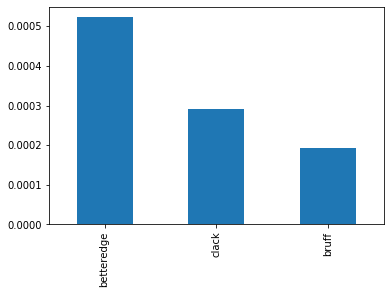

In [155]:
pd.Series(compareWordCounts(input('what word you want to compare?').lower())).plot(kind='bar')

In [157]:
clackSentences = nltk.sent_tokenize(narratorsDict['clack'])

In [159]:
clackSentences[100]

'He noticed two unusual\nthings on entering the room.'

In [161]:
len(clackSentences[100])

51

In [162]:
# Counting words

In [164]:
betteredgeTokens = nltk.word_tokenize(narratorsDict['betteredge'])

In [165]:
len(betteredgeTokens)

94887

In [166]:
betteredgeCounts = {}

for word in betteredgeTokens:
    if word in betteredgeCounts:
        betteredgeCounts[word] = betteredgeCounts[word] + 1
    else:
        betteredgeCounts[word] = 1
        
print(betteredgeCounts)

In [169]:
betteredgeCounter = collections.Counter(betteredgeTokens)

In [171]:
betteredgeCounter['Diamond']

148

In [173]:
betteredgeCounter.most_common(20)

[(',', 6283),
 ('the', 4457),
 ('.', 3473),
 ('to', 2646),
 ('of', 2130),
 ('I', 2044),
 ('and', 1855),
 ('in', 1579),
 ('a', 1453),
 ('“', 1212),
 ('”', 1212),
 ('’', 1190),
 ('that', 1015),
 ('was', 948),
 ('my', 889),
 ('it', 818),
 ('her', 803),
 ('had', 791),
 ('as', 774),
 ('on', 751)]

In [175]:
betCleanTokens = nltk.word_tokenize(removePunctuation(narratorsDict['betteredge'].lower()))

In [184]:

{ narr: makeCounter(text) for narr, text in narratorsDict.items() }
    


{'betteredge': Counter({'first': 137,
          'period': 5,
          'the': 4844,
          'loss': 27,
          'of': 2138,
          'diamond': 160,
          '1848': 1,
          'events': 6,
          'related': 3,
          'by': 335,
          'gabriel': 13,
          'betteredge': 127,
          'house': 188,
          'steward': 4,
          'in': 1678,
          'service': 17,
          'julia': 6,
          'lady': 263,
          'verinder': 75,
          'chapter': 25,
          'i': 2044,
          'part': 28,
          'robinson': 25,
          'crusoe': 25,
          'at': 558,
          'page': 5,
          'one': 197,
          'hundred': 9,
          'and': 1945,
          'twenty': 24,
          'nine': 8,
          'you': 815,
          'will': 181,
          'find': 54,
          'it': 991,
          'thus': 4,
          'written': 18,
          'now': 161,
          'saw': 84,
          'though': 22,
          'too': 58,
          'late': 19,
          'folly': 

In [180]:
def makeCounter(text):
    return collections.Counter(nltk.word_tokenize(removePunctuation(text.lower())))

In [181]:
makeCounter(narratorsDict['betteredge'])

Counter({'first': 137,
         'period': 5,
         'the': 4844,
         'loss': 27,
         'of': 2138,
         'diamond': 160,
         '1848': 1,
         'events': 6,
         'related': 3,
         'by': 335,
         'gabriel': 13,
         'betteredge': 127,
         'house': 188,
         'steward': 4,
         'in': 1678,
         'service': 17,
         'julia': 6,
         'lady': 263,
         'verinder': 75,
         'chapter': 25,
         'i': 2044,
         'part': 28,
         'robinson': 25,
         'crusoe': 25,
         'at': 558,
         'page': 5,
         'one': 197,
         'hundred': 9,
         'and': 1945,
         'twenty': 24,
         'nine': 8,
         'you': 815,
         'will': 181,
         'find': 54,
         'it': 991,
         'thus': 4,
         'written': 18,
         'now': 161,
         'saw': 84,
         'though': 22,
         'too': 58,
         'late': 19,
         'folly': 2,
         'beginning': 14,
         'a': 1498,
        